In [249]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [228]:
yearly_returns = pd.read_excel('assets_yearly_return.xlsx', index_col=0)
yearly_returns /= 100
print("yearly returns", yearly_returns)
number_of_assets = len(yearly_returns.columns)

yearly returns        BNDX    BND   VXUS    VTI   TW50
Date                                   
2007  0.053  0.053  0.182  0.054  0.115
2008  0.056  0.075 -0.453 -0.368 -0.429
2009  0.051  0.035  0.433  0.287  0.740
2010  0.046  0.063  0.119  0.173  0.131
2011  0.054  0.079 -0.135  0.010 -0.155
2012  0.057  0.040  0.183  0.165  0.127
2013 -0.001 -0.021  0.149  0.335  0.119
2014  0.088  0.059 -0.048  0.126  0.176
2015  0.011  0.005 -0.041  0.004 -0.057
2016  0.046  0.025  0.047  0.127  0.191
2017  0.024  0.035  0.275  0.212  0.188
2018  0.029 -0.001 -0.145 -0.052 -0.044
2019  0.079  0.088  0.218  0.308  0.337


Text(0, 0.5, 'yearly returns')

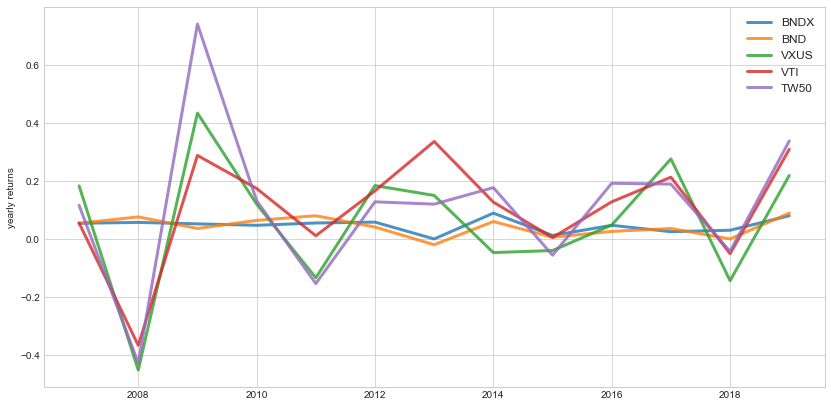

In [229]:
plt.figure(figsize=(14, 7))
for c in yearly_returns.columns.values:
    plt.plot(yearly_returns.index, yearly_returns[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('yearly returns')

In [230]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return std, returns

In [231]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(number_of_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev # sharp ratio
    return results, weights_record

In [232]:
def predefined_portfolios(num_portfolios, weights, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    for i in range(num_portfolios):
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights.values[i], mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev # sharp ratio
    return results

In [233]:
mean_returns = yearly_returns.mean()
cov_matrix = yearly_returns.cov()
risk_free_rate = 0.008
print("mean_returns: ", mean_returns)
print("cov_matrix: ", cov_matrix)

mean_returns:  BNDX    0.045615
BND     0.041154
VXUS    0.060308
VTI     0.106231
TW50    0.110692
dtype: float64
cov_matrix:            BNDX       BND      VXUS       VTI      TW50
BNDX  0.000618  0.000668 -0.000319 -0.000304  0.001038
BND   0.000668  0.001083 -0.001110 -0.001256 -0.000805
VXUS -0.000319 -0.001110  0.051415  0.037467  0.055067
VTI  -0.000304 -0.001256  0.037467  0.034835  0.041473
TW50  0.001038 -0.000805  0.055067  0.041473  0.073218


In [243]:
num_portfolios = 25000
results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

In [244]:
max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=yearly_returns.columns,columns=['allocation'])
max_sharpe_allocation = max_sharpe_allocation.T

min_vol_idx = np.argmin(results[0])
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=yearly_returns.columns,columns=['allocation'])
min_vol_allocation = min_vol_allocation.T

print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print("Annualised Return:", round(rp,3))
print("Annualised Volatility:", round(sdp,3))
print("\n")
print(max_sharpe_allocation)
print("-"*80)
print("Minimum Volatility Portfolio Allocation\n")
print("Annualised Return:", round(rp_min,3))
print("Annualised Volatility:", round(sdp_min,3))
print("\n")
print(min_vol_allocation)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.046
Annualised Volatility: 0.027


                BNDX       BND      VXUS       VTI      TW50
allocation  0.458955  0.499036  0.006087  0.031876  0.004046
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.046
Annualised Volatility: 0.027


                BNDX       BND      VXUS       VTI      TW50
allocation  0.458955  0.499036  0.006087  0.031876  0.004046


In [277]:
assets_weighting = pd.read_excel('assets_weighting.xlsx', index_col=0)
number_of_portfolios = assets_weighting.shape[0]
print("assets_weighting", assets_weighting)
print("number_of_portfolios:", number_of_portfolios)

assets_weighting            BNDX   BND  VXUS   VTI  TW50
Port                                   
BNDX       1.00  0.00  0.00  0.00  0.00
BND        0.00  1.00  0.00  0.00  0.00
VXUS       0.00  0.00  1.00  0.00  0.00
VTI        0.00  0.00  0.00  1.00  0.00
TW50       0.00  0.00  0.00  0.00  1.00
B80S20     0.40  0.40  0.07  0.07  0.06
B70S30_B   0.35  0.35  0.10  0.10  0.10
B70S30_O1  0.45  0.25  0.05  0.20  0.05
B70S30_O2  0.70  0.00  0.00  0.30  0.00
B50S50     0.25  0.25  0.20  0.20  0.10
B30S70     0.15  0.15  0.25  0.25  0.20
number_of_portfolios: 11


In [278]:
results_portfolios = predefined_portfolios(number_of_portfolios, assets_weighting, mean_returns, cov_matrix, risk_free_rate = 0.008)

<Figure size 864x504 with 0 Axes>

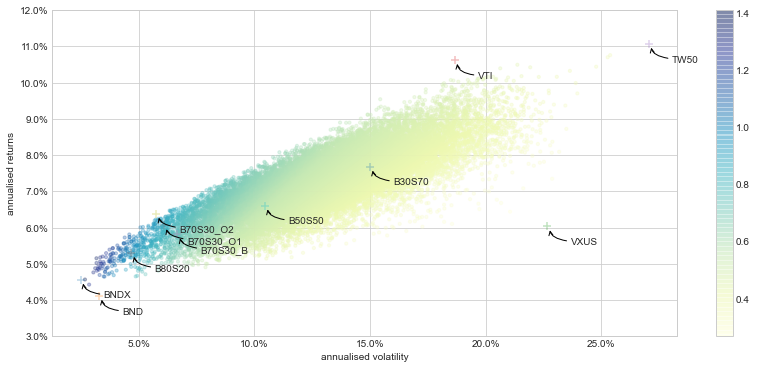

In [299]:
plt.figure(figsize=(12, 7))
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax0 = ax.scatter(results[0,:]*100,results[1,:]*100,c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)

for i in range(number_of_portfolios):
  pt_x = results_portfolios[0, i]*100
  pt_y = results_portfolios[1, i]*100
  ax.scatter(pt_x, pt_y, marker='+', s=50, alpha=0.3)
  ax.annotate(assets_weighting.index.values[i], xy=(pt_x+0.1, pt_y-0.05), xytext=(pt_x+1, pt_y-0.5),
              arrowprops = dict(  arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('annualised volatility')
ax.set_ylabel('annualised returns')
ax.set_ylim([3,12])
fig.colorbar(ax0)
plt.savefig('foo.png', dpi=200)

In [287]:
portfolio_yearly_return = yearly_returns.dot(assets_weighting.T)
print(portfolio_yearly_return)

Port   BNDX    BND   VXUS    VTI   TW50   B80S20  B70S30_B  B70S30_O1  \
Date                                                                    
2007  0.053  0.053  0.182  0.054  0.115  0.06582   0.07220    0.06275   
2008  0.056  0.075 -0.453 -0.368 -0.429 -0.03081  -0.07915   -0.07375   
2009  0.051  0.035  0.433  0.287  0.740  0.12920   0.17610    0.14775   
2010  0.046  0.063  0.119  0.173  0.131  0.07190   0.08045    0.08355   
2011  0.054  0.079 -0.135  0.010 -0.155  0.03515   0.01855    0.03155   
2012  0.057  0.040  0.183  0.165  0.127  0.07078   0.08145    0.08415   
2013 -0.001 -0.021  0.149  0.335  0.119  0.03222   0.05260    0.07470   
2014  0.088  0.059 -0.048  0.126  0.176  0.07482   0.07685    0.08595   
2015  0.011  0.005 -0.041  0.004 -0.057  0.00039  -0.00380    0.00210   
2016  0.046  0.025  0.047  0.127  0.191  0.05204   0.06135    0.06425   
2017  0.024  0.035  0.275  0.212  0.188  0.06897   0.08815    0.08510   
2018  0.029 -0.001 -0.145 -0.052 -0.044 -0.00523  -

In [296]:
mean_series = pd.Series(results_portfolios[1], index=assets_weighting.index.values, name='Mean')
std_series = pd.Series(results_portfolios[0], index=assets_weighting.index.values, name='Std')
portfolio_summary = portfolio_yearly_return.append(mean_series)
portfolio_summary = portfolio_summary.append(std_series)
print(portfolio_summary)
portfolio_summary.to_excel("portfolio_yearly_return.xlsx")

Port      BNDX       BND      VXUS       VTI      TW50    B80S20  B70S30_B  \
Date                                                                         
2007  0.053000  0.053000  0.182000  0.054000  0.115000  0.065820  0.072200   
2008  0.056000  0.075000 -0.453000 -0.368000 -0.429000 -0.030810 -0.079150   
2009  0.051000  0.035000  0.433000  0.287000  0.740000  0.129200  0.176100   
2010  0.046000  0.063000  0.119000  0.173000  0.131000  0.071900  0.080450   
2011  0.054000  0.079000 -0.135000  0.010000 -0.155000  0.035150  0.018550   
2012  0.057000  0.040000  0.183000  0.165000  0.127000  0.070780  0.081450   
2013 -0.001000 -0.021000  0.149000  0.335000  0.119000  0.032220  0.052600   
2014  0.088000  0.059000 -0.048000  0.126000  0.176000  0.074820  0.076850   
2015  0.011000  0.005000 -0.041000  0.004000 -0.057000  0.000390 -0.003800   
2016  0.046000  0.025000  0.047000  0.127000  0.191000  0.052040  0.061350   
2017  0.024000  0.035000  0.275000  0.212000  0.188000  0.068970